# Modeling wine quality based on physicochemical tests - white wine

#### This notebook contains analysis on white wine. Red wine analysis is identical and can be found in a separate notebook.

#### Our aim is to test various machine learning models and their parameters to figure out which one is best for predicting the quality rating of wine. 

#### We will also try to determine the features that affect the quality of wine the most.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
%matplotlib inline

#### We are working with 2 datasets, one containing data about red wine, the other about white wine. Since training the models on a merged dataset produced considerably worse results, we will keep them separate.

# White Wine

### Data analysis

In [2]:
# reading data

df_white = pd.read_csv('winequality-white.csv',sep=";")
df_white['type'] = 'white'
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [3]:
# dataframe
df_white.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white


#### Here we see that our dataset has 13 columns, 11 of which describe the physicochemical attributes of wines, 1 representing the type of wine (white/red) and 1 representing the mean quality rating provided by at least 3 different experts. There are no missing values.

In [4]:
# data information (names of columns, numbers of instances in each column, datatype)
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [5]:
# size of the dataframe

df_white.shape

(4898, 13)

In [6]:
# some statistics on the data

df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#### As we can see, there are significantly more instances with 5 and 6 quality points compared to other ratings. The data is imbalanced. Also, there are no wines rated very bad (1, 2) or very good (10).

In [7]:
# number of instances per quality value

df_white.quality.value_counts().sort_values(ascending=False)

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

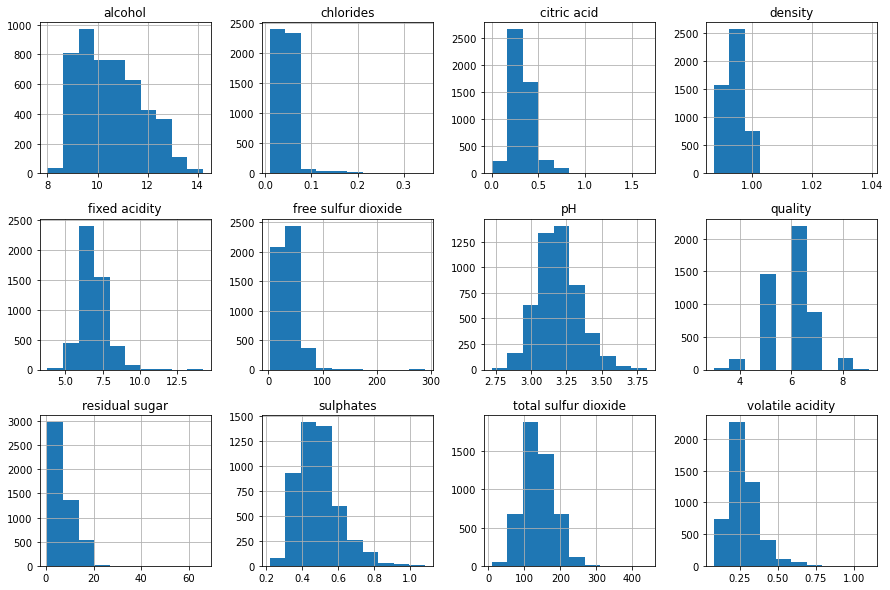

In [8]:
df_white.hist(layout=(3,4), figsize=(15,10))

plt.show()

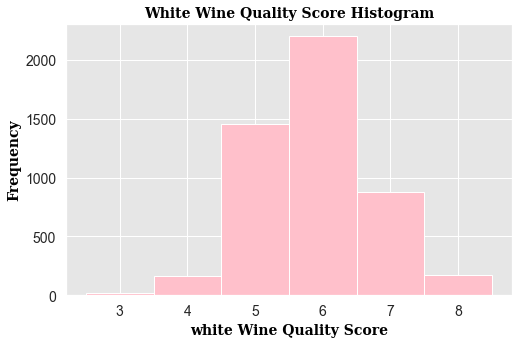

In [9]:
# White Wine Quality Score Histogram

font_black = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

sns.set()

x_data = set(df_white.quality.values)

f, ax = plt.subplots(figsize=(8,5));

ax.set_facecolor((.9, .9, .9));

plt.hist(df_white.quality, color='pink',bins=np.arange(3,8+2)-.5);
plt.xlabel("white Wine Quality Score",fontdict=font_black);
plt.ylabel("Frequency",fontdict=font_black);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("White Wine Quality Score Histogram",fontdict=font_black);

#### There seems to be no significant correlations when it comes to wine quality. The strongest positive correlation there is alcohol content.

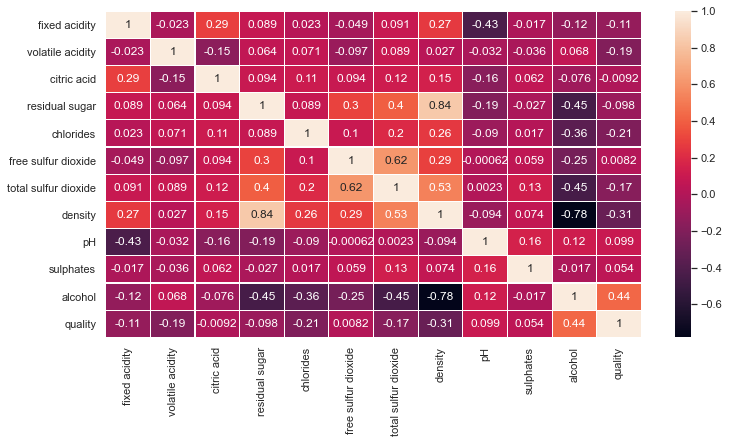

In [10]:
# pairwise correlations of columns

plt.figure(figsize=(12,6))
sns.heatmap(df_white.corr(), annot=True, linewidths = 0.2);

## Classification

In [11]:
# function to train and predict data

def run_model(model,X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train) # trainin model
    
    y_pred = model.predict(X_test) # predicting data
    
    acc = accuracy_score(y_test,y_pred) # accuracy score
    
    #result = confusion_matrix(y_test, y_pred) # confusion matrix
    
    #print(result)
    return acc  # return accuracy

In [12]:
# splitting data into test and training sets

X_train, X_test, y_train, y_test = train_test_split(df_white.drop(columns=['type','quality']),\
                                                    df_white['quality'], test_size = 0.2, random_state=1)

# a new dataframe for storing all the results
results = pd.DataFrame(columns = ['name', 'accuracy score']) 

In [13]:
new_y_train = y_train
new_y_train = new_y_train.replace(3,4)
new_y_train = new_y_train.replace(8,7)

new_y_test = y_test
new_y_test = new_y_test.replace(3,4)
new_y_test = new_y_test.replace(8,7)

### K nearest neighbors

#### With K-nearestneighbor classifier we get 0.498 accuracy score with 26 nearest neighbors

In [14]:
# Searching for max accuracy

max_acc = -1
k_max = -1
acc_list = {'euclidean':[],'manhattan':[]}

for k in range(10,50):
    for m  in ['euclidean','manhattan']:
        
        knb = KNeighborsClassifier(n_neighbors=k,metric=m)
    
        acc = run_model(knb,X_train, X_test, y_train, y_test)
        acc_list[m].append(acc)
        
        if acc > max_acc :
            max_acc = acc
            k_max  = k
  
    
    
print("Highest KNN accuracy: " + str(max_acc) + "; K = " + str(k_max))

results = results.append({'name' : "KNN N=" + str(k_max), 'accuracy score' : max_acc},  
                         ignore_index = True)

Highest KNN accuracy: 0.49795918367346936; K = 26


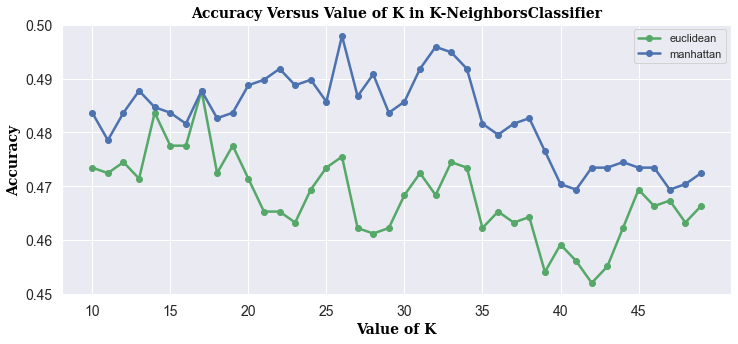

In [15]:
# plotting accuracy 

fig , ax1 = plt.subplots(figsize=(12, 5))

plt.xlabel("Value of K",fontdict=font_black);
plt.ylabel("Accuracy",fontdict=font_black);

ax1.plot(range(10,50), acc_list['euclidean'] , color='g',linewidth=2.5,marker='o')
ax1.plot(range(10,50), acc_list['manhattan'] , color='b',linewidth=2.5,marker='o')

plt.xticks(range(10,50,5) ,fontsize=14)

plt.yticks(fontsize=14);
plt.title("Accuracy Versus Value of K in K-NeighborsClassifier",fontdict=font_black);
plt.legend(['euclidean','manhattan'])
plt.show()

#### Trying out KNN for the second time, this time scaling the data first.

In [16]:
# Scaling 

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


# scaled data put into a dataframe so it would be easier to see how the values were changed
df_x_train_scaled = pd.DataFrame(X_train_scaled, columns=['fixed acidity', 'volatile acidity', 'citric acid', 
                                                          'residual sugar', 'chlorides', 'free sulfur dioxide',
                                                         'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

df_x_test_scaled = pd.DataFrame(X_test_scaled, columns=['fixed acidity', 'volatile acidity', 'citric acid', 
                                                          'residual sugar', 'chlorides', 'free sulfur dioxide',
                                                         'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

In [17]:
# seeing what the values look like before and after scaling

X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3749,6.3,0.28,0.29,6.8,0.051,40.0,143.0,0.99374,3.43,0.59,11.0
1344,7.3,0.23,0.37,1.9,0.041,51.0,165.0,0.99080,3.26,0.40,12.2
58,6.6,0.38,0.15,4.6,0.044,25.0,78.0,0.99310,3.11,0.38,10.2
3177,5.6,0.41,0.22,7.1,0.050,44.0,154.0,0.99310,3.30,0.40,10.5
3942,7.2,0.23,0.39,1.5,0.053,26.0,106.0,0.99166,3.18,0.47,11.1
...,...,...,...,...,...,...,...,...,...,...,...
2895,6.4,0.44,0.26,2.0,0.054,20.0,180.0,0.99520,3.58,0.57,10.0
2763,7.7,0.30,0.34,1.2,0.048,4.0,119.0,0.99084,3.18,0.34,12.1
905,8.4,0.19,0.42,1.6,0.047,9.0,101.0,0.99400,3.06,0.65,11.1
3980,6.1,0.22,0.25,12.1,0.035,54.0,135.0,0.99481,3.21,0.40,10.7


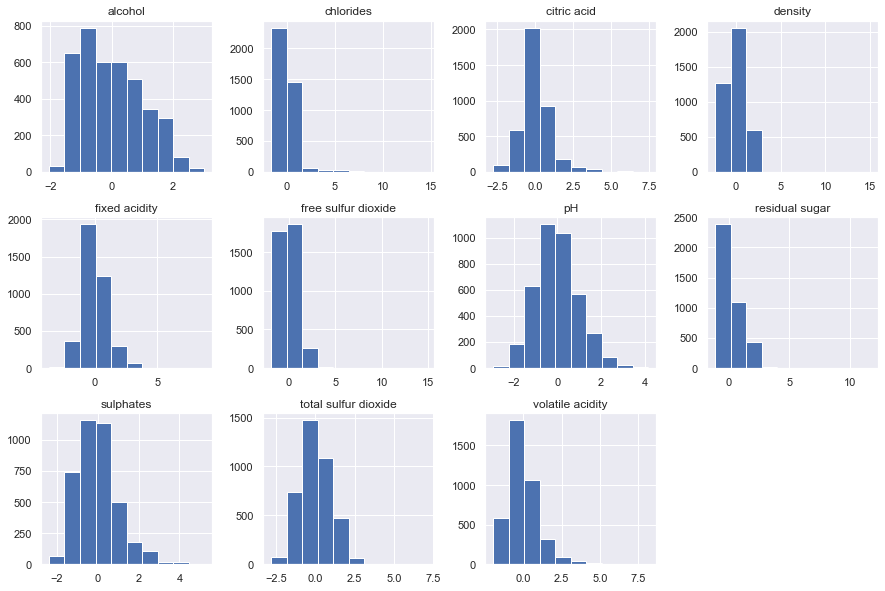

In [18]:
df_x_train_scaled.hist(layout=(3,4), figsize=(15,10))

plt.show()

In [19]:
df_x_train_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.655456,0.017802,-0.363042,0.078618,0.265522,0.271421,0.107326,-0.100478,1.600552,0.884872,0.407631
1,0.532671,-0.478983,0.300467,-0.885441,-0.218458,0.912691,0.622733,-1.083106,0.478911,-0.793044,1.388055
2,-0.299018,1.011373,-1.524183,-0.354225,-0.073264,-0.603037,-1.415469,-0.314383,-0.510772,-0.969667,-0.245985
3,-1.487144,1.309444,-0.943612,0.137642,0.217124,0.504610,0.365030,-0.314383,0.742826,-0.793044,-0.000879
4,0.413858,-0.478983,0.466345,-0.964140,0.362318,-0.544740,-0.759496,-0.795670,-0.048920,-0.174865,0.489333
...,...,...,...,...,...,...,...,...,...,...,...
3913,-0.536643,1.607515,-0.611858,-0.865767,0.410716,-0.894524,0.974148,0.387494,2.590235,0.708249,-0.409389
3914,1.007921,0.216516,0.051651,-1.023164,0.120328,-1.827279,-0.454937,-1.069736,-0.048920,-1.322913,1.306353
3915,1.839610,-0.876411,0.715161,-0.944465,0.071930,-1.535793,-0.876634,-0.013579,-0.840667,1.414740,0.489333
3916,-0.893081,-0.578340,-0.694796,1.121377,-0.508846,1.087583,-0.080095,0.257145,0.149017,-0.793044,0.162525


In [20]:
# calculating the accuracy after scaling

max_acc = -1
k_max = -1
acc_list = {'euclidean':[],'manhattan':[]}

for k in range(10,50):
    for m  in ['euclidean','manhattan']:
        
        knb = KNeighborsClassifier(n_neighbors=k,metric=m)
        acc = run_model(knb,X_train_scaled, X_test_scaled, y_train, y_test)
        acc_list[m].append(acc)

        if acc > max_acc :
            max_acc = acc
            k_max=k
        

print("Highest KNN accuracy with scaled data: " + str(max_acc) + "; K = " + str(k_max))

results = results.append({'name' : "KNN scaled N=" + str(k_max), 'accuracy score' : max_acc},  
                         ignore_index = True)

Highest KNN accuracy with scaled data: 0.5540816326530612; K = 17


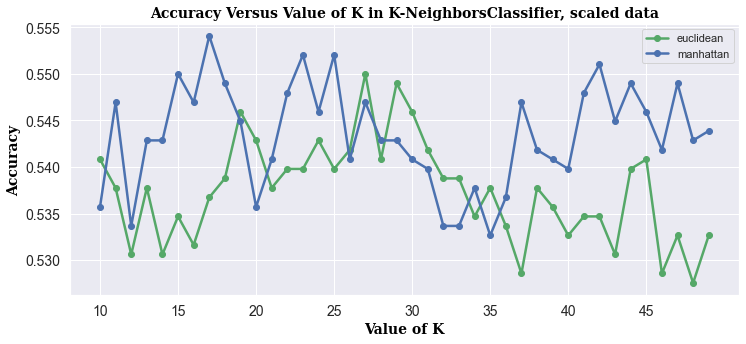

In [21]:
# plotting accuracy 

fig , ax1 = plt.subplots(figsize=(12, 5))
plt.xlabel("Value of K",fontdict=font_black);
plt.ylabel("Accuracy",fontdict=font_black);

ax1.plot(range(10,50), acc_list['euclidean'] , color='g',linewidth=2.5,marker='o')
ax1.plot(range(10,50), acc_list['manhattan'] , color='b',linewidth=2.5,marker='o')

plt.xticks(range(10,50,5) ,fontsize=14)
plt.yticks(fontsize=14);
plt.title("Accuracy Versus Value of K in K-NeighborsClassifier, scaled data",fontdict=font_black);

plt.legend(['euclidean','manhattan'])
plt.show()

#### From this we can see that KNN works a bit better on scaled data (accuracy 0.497 vs 0.554).

### Decision Tree

In [22]:
dt = DecisionTreeClassifier(random_state = 42)

results = results.append({'name' : "DTC", 'accuracy score' : run_model(dt,X_train, X_test, y_train, y_test)},  
                         ignore_index = True)

### Random Forest Classifier 

In [23]:
rf = RandomForestClassifier(n_estimators = 600, random_state = 42)

results = results.append({'name' : "RandomForestClassifier n = 600", 'accuracy score' : run_model(rf,X_train, X_test, y_train, y_test)},  
                         ignore_index = True)

### Support Vector Classification

In [24]:
svc = SVC(kernel='rbf',gamma='auto',random_state = 42)

results = results.append({'name' : "SVC kernel = rbf; gamma = auto", 'accuracy score' : run_model(svc,X_train, X_test, y_train, y_test)},  
                         ignore_index = True)

In [25]:
svc = SVC(kernel='poly',random_state = 42)

results = results.append({'name' : "SVC kernel = poly; gamma = auto", 'accuracy score' : run_model(svc,X_train, X_test, y_train, y_test)},  
                         ignore_index = True)

In [26]:
svc = SVC(kernel='linear',random_state = 42)

results = results.append({'name' : "SVC kernel = linear; gamma = auto", 'accuracy score' : run_model(svc,X_train, X_test, y_train, y_test)},  
                         ignore_index = True)

In [27]:
results

,name,accuracy score
0,KNN N=26,0.497959
1,KNN scaled N=17,0.554082
2,DTC,0.607143
3,RandomForestClassifier n = 600,0.689796
4,SVC kernel = rbf; gamma = auto,0.565306
5,SVC kernel = poly; gamma = auto,0.447959
6,SVC kernel = linear; gamma = auto,0.506122


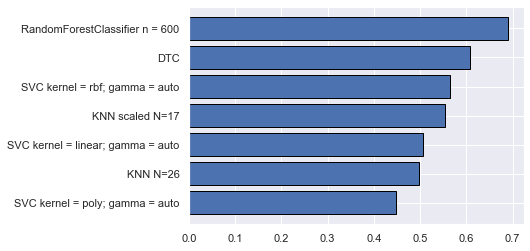

In [28]:
results.sort_values(by = 'accuracy score',inplace=True)
plt.barh(results['name'],results['accuracy score'],edgecolor ='black')
plt.show()

In [29]:
results

,name,accuracy score
5,SVC kernel = poly; gamma = auto,0.447959
0,KNN N=26,0.497959
6,SVC kernel = linear; gamma = auto,0.506122
1,KNN scaled N=17,0.554082
4,SVC kernel = rbf; gamma = auto,0.565306
2,DTC,0.607143
3,RandomForestClassifier n = 600,0.689796


## Cross Validation with Random Forest

In [30]:
cv = KFold(n_splits=5 , random_state=42, shuffle=True)
scores = cross_val_score(rf, X_train,y_train, scoring='accuracy', cv=cv)
print("Cross-validated scores:", scores)
print("mean score:", scores.mean())

Cross-validated scores: [0.65816327 0.66709184 0.6619898  0.67943806 0.66922095]
mean score: 0.6671807803581202


In [31]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(rf, X_train,y_train, scoring='accuracy', cv=cv)
print("Cross-validated scores:", scores)
print("mean score:", scores.mean())

Cross-validated scores: [0.67219388 0.67729592 0.64285714 0.6743295  0.6807152  0.68367347
 0.65943878 0.66581633 0.67816092 0.62835249 0.65943878 0.66326531
 0.66581633 0.64878672 0.6449553 ]
mean score: 0.6630064030720847


We have tried to find parameters which give the best accuracy scores 

In [32]:
param_grid ={'bootstrap': [True, False],
 'max_depth': [10, 15, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [500,600]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,cv=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  5.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [500, 600]},
             verbose=3)

In [33]:
best_params = grid.best_params_
print(best_params)
best_score = grid.best_score_
print(best_score)
{'bootstrap': True, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 
'min_samples_split': 5, 'n_estimators': 1100}
best_score = .68

{'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
0.6373149566105155


#### With parameters above the best accuracy score we can get is 0.64

### Regression

#### At this point we applied Regression to train the data and according to the results Regression is more accurate with the data.

In [34]:
def run_reg_model(model,X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test,y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    
    return (r2,mse)

In [35]:
lr = LinearRegression()
r2 , mse = run_reg_model(lr,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.2901221946696403 0.5425487263544204


In [36]:
svr = SVR(kernel = 'linear',gamma='auto')
r2 , mse = run_reg_model(svr,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.27300630054855324 0.5556301418967634


In [37]:
rf = RandomForestRegressor(n_estimators = 1001, random_state = 42)
r2 , mse = run_reg_model(rf,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.5319015866777645 0.3577604427825635


In [38]:
lasso  = Lasso(alpha=0.001)
r2 , mse = run_reg_model(lasso ,X_train, X_test, y_train, y_test)
print(r2 , mse)

0.27875625896153067 0.5512355368110332


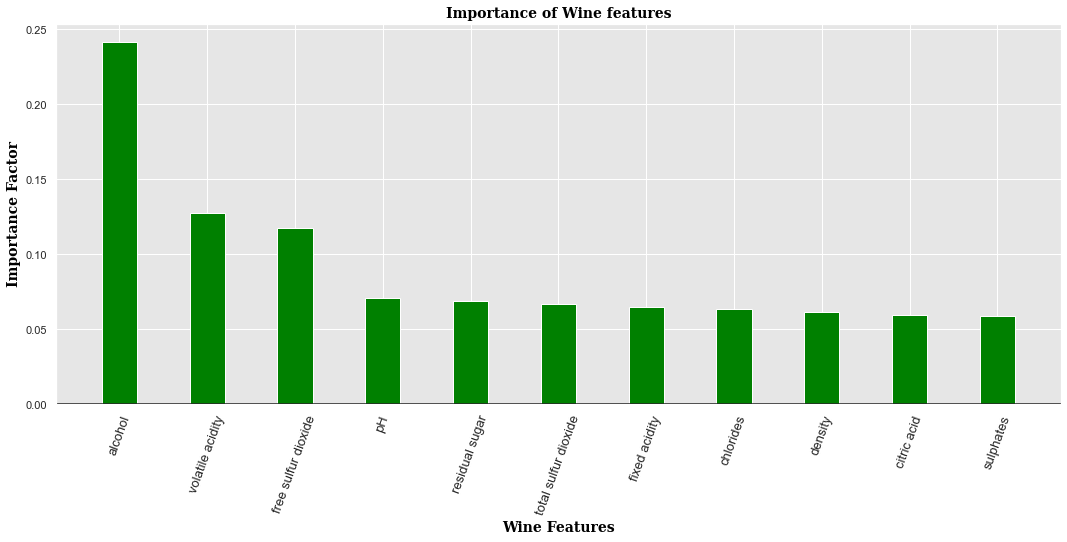

In [39]:
# most releated features(column)

important_feature = pd.DataFrame(columns=['feature','Importance_factor'])
important_feature['feature'] = X_train.columns
important_feature['Importance_factor'] = rf.feature_importances_
important_feature.sort_values(by='Importance_factor',ascending=False,inplace=True)


f, ax = plt.subplots(figsize=(18,7))
ax.set_facecolor((.9, .9, .9)) 
x_data = important_feature.feature
y_data = important_feature.Importance_factor
x_pos = list(range(len(x_data)))


plt.bar(x_data,y_data, color="green",width=.4)
plt.xticks(x_pos,x_data,fontsize=13,rotation=70);
plt.title("Importance of Wine features",fontdict=font_black)
plt.xlabel("Wine Features",fontdict=font_black,)
plt.ylabel("Importance Factor",fontdict=font_black)
plt.axhline(0, color='black');